### Q. Any idea on managing these 200+ features after ohe?

In [ ]:
# ## for colab
# # !pip install -U -q PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# ## for colab
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive')

In [55]:
## common imports
import numpy as np
import pandas as pd
import os
import pickle
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [56]:
## to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## to make this notebook's output stable across runs
np.random.seed(42)

In [57]:
import tensorflow as tf
print(tf.__version__)

1.13.0-rc2


In [58]:
## import sklearn packages
# from sklearn.metrics import precision_score, recall_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import precision_recall_curve

# 01_ReadData

In [59]:
## for colab 
## read the data
# df_all = pd.read_csv('/content/drive/My Drive/Final Project_Nisal David Elsa/insurance_classification_data.csv')  

In [78]:
# # read in the raw data to a data frame and saves it to pickle
# df_all = pd.read_csv('../final_project_data/insurance_classification_data.csv')
with open('../final_project_data/insurance_clf_data.pickle','wb') as file:
    pickle.dump(df_all, file)

In [116]:
## read the data
with open('../final_project_data/insurance_clf_data.pickle','rb') as file:
    df_all = pickle.load(file)

In [117]:
df_all.shape

(1795672, 89)

In [92]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795672 entries, 0 to 1795671
Data columns (total 89 columns):
uniqueID    int64
Var01       object
Var03       object
Var07       int64
Var10       float64
Var11       object
Var13       object
Var14       object
Var19       object
Var20       object
Var21       object
Var23       object
Var25       object
Var26       float64
Var27       float64
Var28       float64
Var29       float64
Var30       int64
Var31       int64
Var32       int64
Var33       int64
Var34       int64
Var35       int64
Var42       int64
pred_s      float64
Var47       float64
Var48       object
Var49       object
Var50       int64
Var51       object
Var52       object
Var53       object
Var55       object
c01         object
c02         object
c03         object
c06         object
c07         object
c08         float64
c09         float64
c10         float64
c11         float64
c12         float64
c13         object
c14         object
c15         float64
c17       

In [93]:
df_all.head()

,uniqueID,Var01,Var03,Var07,Var10,Var11,Var13,Var14,Var19,Var20,...,c05,c16,c26,c34,c35,c38,c39,c40,id,train
0,352373,A,A,0,2.0,B,A,A,C,B,...,28.0,8.0,21.0,20.0,19.0,14.0,17.0,13.0,8747.0,Y
1,352373,A,A,0,2.0,B,A,A,C,B,...,28.0,8.0,21.0,20.0,19.0,14.0,17.0,13.0,8747.0,Y
2,765898,A,A,0,2.0,B,A,A,C,B,...,29.0,21.0,21.0,20.0,19.0,5.0,17.0,13.0,8747.0,Y
3,765898,A,A,0,2.0,B,A,A,C,B,...,29.0,21.0,21.0,20.0,19.0,5.0,17.0,13.0,8747.0,Y
4,138374,B,A,0,2.0,A,E,A,C,B,...,24.0,24.0,21.0,0.0,19.0,30.0,17.0,13.0,40261.0,Y


# 02a_DataManipulation_basic

#### Remove duplicates

In [118]:
## check duplicates
duplicateRowsDF = df_all[df_all.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Duplicate Rows except first occurrence based on all columns are :


(1537, 89)

In [119]:
df_all = df_all.drop_duplicates()
print(df_all.shape)

(1794135, 89)


#### remove data where pred_s is missing?  what do we need to do with id missing ?

In [115]:
# df_all = df_all.dropna(subset=['pred_s'])
# print(df_all.shape)

(1646188, 89)


In [114]:
# Look at some of the unique values within each variable 
for col in list(df_all.columns):
    uniques = df_all[col].unique() # get a list of unique values  
    uniques.sort()
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(uniques)<105:
        print(col + ':')
        print(uniques)
    else:
        print(col + ': ' + str(len(uniques)) + ' unique values')

uniqueID: 780363 unique values
Var01:
['A' 'B' 'C']
Var03:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'L' 'N' 'P' 'Q' 'Z']
Var07:
[0 1 2 3 4 5]
Var10:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
Var11:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'Z']
Var13:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S']
Var14:
['A' 'B' 'C' 'D' 'E' 'F' 'Z']
Var19:
['A' 'B' 'C' 'D' 'E' 'F' 'G']
Var20:
['A' 'B']
Var21:
['A' 'B' 'C' 'D' 'Z']
Var23:
['A' 'B' 'C' 'Z']
Var25:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M']
Var26:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Var27:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
Var28:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan]
Var29:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 nan]
Var30:
[0 1 2 3]
Var31:
[0 1 2 3]
Var32:
[0 1 2 3]
Var33:
[0 1 2 3]
Var34:
[0 1 2 3]
Var35:
[0 1 2 3 4 5]
Var42:
[

# 02b_DataManipulations_missings

#### replacing missing by the mode if it is categorical and the mean if numeric

In [85]:
## check missing values
def check_missings(df):
    total = df.isnull().sum()
    percent = df.isnull().sum()/df.isnull().count()*100
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing

In [86]:
missing_list = check_missings(df_all)

In [87]:
print(missing_list[missing_list.Total>0].sort_values(by='Total',ascending=False))

         Total    Percent
c04     663757  40.318842
c39     436774  26.531128
c40     432324  26.260820
c38     421798  25.621435
c16     258918  15.727554
c05     252331  15.327437
id      163260   9.916964
c18     157720   9.580445
c15     155295   9.433143
c08     154590   9.390319
c09     154590   9.390319
c10     154590   9.390319
c19      69516   4.222637
c26      54755   3.326004
c27      37962   2.305940
c34      25457   1.546344
c35      25457   1.546344
c12      10468   0.635862
c11       9156   0.556166
Var12     5197   0.315683
pred_s      82   0.004981
Var02       11   0.000668
Var10       11   0.000668
Var29        5   0.000304
Var28        5   0.000304
Var26        4   0.000243
Var27        4   0.000243


In [88]:
indicator_cols = missing_list.loc[missing_list['Total']>0].drop_duplicates().index.values.tolist()

In [89]:
indicator_cols

['Var10',
 'Var26',
 'Var28',
 'pred_s',
 'c08',
 'c11',
 'c12',
 'c15',
 'c18',
 'c19',
 'c27',
 'Var12',
 'c04',
 'c05',
 'c16',
 'c26',
 'c34',
 'c38',
 'c39',
 'c40',
 'id']

<p>** A little confused with the following instruction. **<br> So you could create one missing indicator variable and use it for all of them.  Then for example if you create a logistic model and the target follows a different  pattern for examples with imputed mean than for cases that really are at the mean  (which is almost certainly will) then the missing indicator can pick that up.

In [121]:
print(list(df_all))

['uniqueID', 'Var01', 'Var03', 'Var07', 'Var10', 'Var11', 'Var13', 'Var14', 'Var19', 'Var20', 'Var21', 'Var23', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var42', 'pred_s', 'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53', 'Var55', 'c01', 'c02', 'c03', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c36', 'c37', 'Var54', 'Var56', 'Var02', 'Var04', 'Var05', 'Var06', 'Var08', 'Var09', 'Var12', 'Var15', 'Var16', 'Var18', 'Var22', 'Var24', 'c04', 'c05', 'c16', 'c26', 'c34', 'c35', 'c38', 'c39', 'c40', 'id', 'train']


In [122]:
target = ['Var47']

labels = ['uniqueID','id', 'train']

features = ['Var01', 'Var03', 'Var07', 'Var10', 'Var11', 'Var13',
             'Var14', 'Var19', 'Var20', 'Var21', 'Var23', 'Var25', 'Var26',
             'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 
             'Var34', 'Var35', 'Var42', 'Var48', 'Var49', 
             'Var50', 'Var51', 'Var52', 'Var53', 'Var55', 
             'c01', 'c02', 'c03', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 
             'c13', 'c14', 'c15', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 
             'c24', 'c25', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c36', 'c37', 
             'Var54', 'Var56', 'Var02', 'Var04', 'Var05', 'Var06', 'Var08', 'Var09', 
             'Var12', 'Var15', 'Var16', 'Var18', 'Var22', 'Var24', 
             'c04', 'c05', 'c16', 'c26', 'c34', 'c35', 'c38', 'c39', 'c40']


na_indicator_cols = ['Var10', 'Var26', 'Var28', 'c08','c11', 'c12', 'c15',
                          'c18', 'c19', 'c27', 'Var12', 'c04', 'c05', 'c16', 'c26', 
                          'c34', 'c38', 'c39', 'c40',]

In [123]:
df_na_indicators = df_all[na_indicator_cols].isnull().astype(int8).add_suffix('_NA')

In [124]:
## Remove duplicated Missing Indicators

# df_na_indicators = df_all[features].isnull().astype(int).add_suffix('_NA')

# def duplicate_columns(df):
#     """Find duplicate columns in a DataFrame based on their values.
    
#     [Source] https://github.com/pandas-dev/pandas/issues/11250 
    
#     """   
#     groups = df.columns.to_series().groupby(df.dtypes).groups
#     dups = []

#     for t, v in groups.items():

#         cs = df[v].columns
#         vs = df[v]
#         lcs = len(cs)

#         for i in range(lcs):
#             iv = vs.iloc[:,i].tolist()
#             for j in range(i+1, lcs):
#                 jv = vs.iloc[:,j].tolist()
#                 if iv == jv:
#                     dups.append(cs[i])
#                     break

#     return dups


# dup_col_list = duplicate_columns(df_na_indicators)
# df_na_indicators = df_na_indicators.drop(duplicate_columns_list, axis=1)
# print(df_na_indicators.columns)

In [125]:
## Impute missing values 
## [Source] https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [137]:
df_all_filled = DataFrameImputer().fit_transform(df_all[features])
# print(df_all_filled.head().transpose())

df_all_a = pd.concat([df_all_filled, df_na_indicators, df_all[['train','Var47','pred_s', 'uniqueID','id']]], axis=1) 

df_all_b = pd.get_dummies(df_all_a)

In [133]:
check_unique_values(df_all_b)

Var07:
[0 1 2 3 4 5]
Var10:
[-1.          1.          2.          3.          4.          5.
  6.          7.          8.          8.59283036  9.         10.
 11.         12.         13.         14.         15.         16.
 17.        ]
Var26:
[ 1.          2.          3.          4.          5.          6.
  7.          8.          9.          9.64562565 10.         11.
 12.         13.         14.         15.         16.         17.
 18.         19.         20.        ]
Var27:
[-1.          1.          2.          3.          4.          5.
  6.          7.          8.          8.51465361  9.         10.
 11.         12.         13.         14.         15.         16.
 17.        ]
Var28:
[ 1.          2.          3.          4.          5.          6.
  7.          8.          8.04023677  9.         10.         11.
 12.         13.         14.         15.        ]
Var29:
[-1.          1.          2.          3.          4.          5.
  6.          7.          8.          8.60179418

In [89]:
with open('../final_project_data/insurance_clf_data_new.pickle','wb') as file:
    pickle.dump(df_all_b, file)

# 03a_EDA_basic

### check for distributions, correlation, ...
<p>Q. how to deal with categorical data?
<p>Todo. correlcation analysis

#### Train test split

In [102]:
## training set
df_train = df_all.loc[df_all.train=="Y"]
print(df_train.shape)

(1646270, 89)


In [ ]:
## test set
df_test = df_all.loc[df_all.train=="N"]
print(df_test.shape)

In [ ]:
# # Split numeric and categorical features for training set
# cat_train_feats = data_train.select_dtypes(include=['object']).columns
# num_train_feats = data_train.select_dtypes(include=['float64','int64']).columns
# num_train_df = data_train[num_train_feats]
# cat_train_df = data_train[cat_train_feats]
# print('There are %d numeric features and %d categorical features in the training dataset\n' %(len(num_train_feats),len(cat_train_feats)))
# print('Numeric features:\n',num_train_feats.values)
# print('Categorical features:\n',cat_train_feats.values)

#### Unique values within each variable

In [132]:
# Look at some of the unique values within each variable 
def check_unique_values(df):
    for col in list(df.columns):
        uniques = df[col].unique() # get a list of unique values  
        uniques.sort()
        # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
        if len(uniques)<30:
            print(col + ':')
            print(uniques)
        else:
            print(col + ': ' + str(len(uniques)) + ' unique values')

# 03a_EDA_distribution

In [111]:
def cat_barplot(var):
    clean_var = df_train[var].fillna('Missing')
    var_counts = clean_var.value_counts()
    barplot = sns.barplot(x=var_counts.index, y=var_counts.values, alpha=1)
    return var_counts, barplot

In [112]:
# plt.figure(figsize=(16,16))
# plt.subplot(221); cat_barplot('Var03')
# plt.subplot(222); cat_barplot('Var01')

(19.586888    663757
 37.000000    117448
 22.000000    116979
 30.000000    108399
 14.000000    104846
 5.000000      92679
 17.000000     92440
 10.000000     90592
 26.000000     81311
 33.000000     65597
 2.000000      56748
 7.000000      30819
 0.000000      24655
 Name: c04, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a353724a8>)

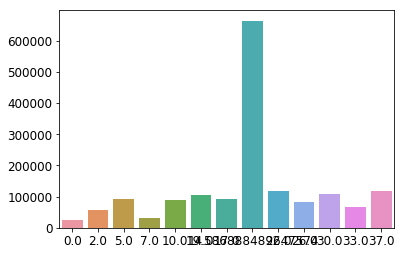

In [113]:
cat_barplot('c04')

In [ ]:
plt.figure(figsize=(16,16))
cat_barplot('c05')

# 03b_EDA_boxplot

#### Categorical data & odrinary data, relation with classification target 0/1 (Boxplots)

In [ ]:
df_train.boxplot('c04','Var47', rot = 30,figsize=(5,6))

# 03a_EDA_pred_s

#### Exsiting linear model accuracy pred_s  |  threshold = 50
<p> the following could be replaced by confusion matrix

In [48]:
Var47_counts = df_train['Var47'].value_counts()
print(Var47_counts)

0.0    836051
1.0    810219
Name: Var47, dtype: int64


In [ ]:
TP = len(data_train[(data_train['pred_s']>=50) & (data_train['Var47']==1)]) 
TN = len(data_train[(data_train['pred_s']<50) & (data_train['Var47']==0)]) 
accuracy = (TP+TN)/(data_train.shape[0])
print(accuracy)

# 04a_LinearModel

<p>Q. How to impute missing values
<p>Q. What could we do with categorical data ABCDE? What could we do with discreate numerical data 1 2 3 4 5?
<p>Q. In theory, we can only use training set for model building, however, the categorical data make onehot encoding complicated if we conduct it for train and test set seperately. And error "X has 254 features per sample; expecting 273" happened. Is there any good way to do it?

In [6]:
## read the data
with open('../final_project_data/insurance_clf_data_new.pickle','rb') as file:
    df_all = pickle.load(file)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794135 entries, 0 to 1795671
Columns: 299 entries, uniqueID to train_Y
dtypes: float64(28), int64(41), uint8(230)
memory usage: 1.3 GB


#### df_train & df_test

In [11]:
df_train = df_all.loc[df_all.train_Y==1]
df_test = df_all.loc[df_all.train_Y==0]
print(df_train.shape, df_test.shape)

(1646270, 299) (147865, 299)


In [51]:
Var47_counts = df_test['Var47'].value_counts()
print(Var47_counts)

0.492154    147865
Name: Var47, dtype: int64


In [54]:
df_test['Var47']

11         0.492154
12         0.492154
13         0.492154
14         0.492154
15         0.492154
26         0.492154
56         0.492154
57         0.492154
78         0.492154
103        0.492154
104        0.492154
124        0.492154
125        0.492154
129        0.492154
130        0.492154
145        0.492154
146        0.492154
157        0.492154
158        0.492154
159        0.492154
183        0.492154
184        0.492154
197        0.492154
198        0.492154
230        0.492154
250        0.492154
251        0.492154
285        0.492154
286        0.492154
287        0.492154
             ...   
1795468    0.492154
1795471    0.492154
1795485    0.492154
1795486    0.492154
1795487    0.492154
1795488    0.492154
1795502    0.492154
1795503    0.492154
1795522    0.492154
1795523    0.492154
1795545    0.492154
1795546    0.492154
1795547    0.492154
1795548    0.492154
1795560    0.492154
1795606    0.492154
1795607    0.492154
1795608    0.492154
1795628    0.492154


#### Sampling (This part needs furture improvement)
<p> Limited by our computing resources, we are now using a small sample of data to train models.

<p> Considering stratified sampling?

In [22]:
from sklearn.model_selection import train_test_split
df_train_b, df_train_s = train_test_split(df_train, test_size=0.1, random_state=42)
print(df_train_b.shape, df_train_s.shape)

(1481643, 299) (164627, 299)


In [ ]:
# # Divide by 1.5 to limit the number of income categories
# housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# # Label those above 5 as 5
# housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(housing, housing["income_cat"]):
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]

In [ ]:
# def income_cat_proportions(data):
#     return data["income_cat"].value_counts() / len(data)

# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# compare_props = pd.DataFrame({
#     "Overall": income_cat_proportions(housing),
#     "Stratified": income_cat_proportions(strat_test_set),
#     "Random": income_cat_proportions(test_set),
# }).sort_index()
# compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
# compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
# compare_props

In [ ]:
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("income_cat", axis=1, inplace=True)

#### Select input data for training models

In [23]:
## All variables in the transformed dataframe
features = list(df_all)
df_features = pd.DataFrame(np.array(list(df_all)).reshape(23, 13))
df_features

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,uniqueID,Var07,Var10,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35
1,Var42,pred_s,Var47,Var50,c08,c09,c10,c11,c12,c15,c18,c19,c27
2,Var54,Var02,Var04,Var05,Var06,Var08,Var09,Var12,Var15,Var16,Var18,Var22,Var24
3,c04,c05,c16,c26,c34,c35,c38,c39,c40,id,Var10_NA,Var26_NA,Var28_NA
4,Var47_NA,c08_NA,c11_NA,c12_NA,c15_NA,c18_NA,c19_NA,c27_NA,Var12_NA,c04_NA,c05_NA,c16_NA,c26_NA
5,c34_NA,c38_NA,c39_NA,c40_NA,Var01_A,Var01_B,Var01_C,Var03_A,Var03_B,Var03_C,Var03_D,Var03_E,Var03_F
6,Var03_G,Var03_H,Var03_I,Var03_J,Var03_L,Var03_N,Var03_P,Var03_Q,Var03_Z,Var11_A,Var11_B,Var11_C,Var11_D
7,Var11_E,Var11_F,Var11_G,Var11_Z,Var13_A,Var13_B,Var13_C,Var13_D,Var13_E,Var13_F,Var13_G,Var13_H,Var13_I
8,Var13_J,Var13_K,Var13_L,Var13_M,Var13_N,Var13_O,Var13_P,Var13_Q,Var13_R,Var13_S,Var13_Z,Var14_A,Var14_B
9,Var14_C,Var14_D,Var14_E,Var14_F,Var14_Z,Var19_A,Var19_B,Var19_C,Var19_D,Var19_E,Var19_F,Var19_G,Var19_Z


In [24]:
## setting the inputs the output for our classification task
target = ['Var47']

labels = ['uniqueID', 'id', 'train_N', 'train_Y', 'Var47','pred_s']

variables = ['Var01', 'Var03', 'Var07', 'Var10', 'Var11', 'Var13',
             'Var14', 'Var19', 'Var20', 'Var21', 'Var23', 'Var25', 'Var26',
             'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 
             'Var34', 'Var35', 'Var42', 'Var48', 'Var49', 
             'Var50', 'Var51', 'Var52', 'Var53', 'Var55', 
             'c01', 'c02', 'c03', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 
             'c13', 'c14', 'c15', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 
             'c24', 'c25', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c36', 'c37', 
             'Var54', 'Var56', 'Var02', 'Var04', 'Var05', 'Var06', 'Var08', 'Var09', 
             'Var12', 'Var15', 'Var16', 'Var18', 'Var22', 'Var24', 
             'c04', 'c05', 'c16', 'c26', 'c34', 'c35', 'c38', 'c39', 'c40']

In [25]:
## setting the inputs the output for our classification task
features_01 = list(set(features) - set(labels))
print(len(features_01))

293


#### X_train  & y_train

In [26]:
X_train_01 = df_train_s[features_01].values.astype(np.int)
y_train = df_train_s[target].values.astype(np.int)
print(X_train_01.shape, y_train.shape)

(164627, 293) (164627, 1)


#### X_test & y_test

In [27]:
X_test_01 = df_test[features_01].values.astype(np.int)
y_test = df_test[target].values.astype(np.int)
print(X_test_01.shape, y_test.shape)

(147865, 293) (147865, 1)


#### Performance measurements

In [28]:
# This is a function which outputs a variety of accuracy results. We can use these results to compare models.

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_vals, preds, threshes):
    # calculates specificity
    return sum((preds < threshes) & (y_vals == 0)) /sum(y_vals ==0)

def print_report(y_vals, preds, threshes):
    
    auc = roc_auc_score(y_vals, preds)
    accuracy = accuracy_score(y_vals, (preds > threshes))
    recall = recall_score(y_vals, (preds > threshes))
    precision = precision_score(y_vals, (preds > threshes))
    specificity = calc_specificity(y_vals, preds, threshes)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity 

# 04_b. Logistic
<p> Toooo low validation accuracy now.

In [29]:
# ## use a small sample; 30% of training data
# X_train = X0_train_s
# y_train = y0_train_s
# X_test = X0_test
# y_test = y0_test

In [30]:
## 
X_train = X_train_01
y_train = y_train
X_test = X_test_01
y_test = y_test

In [31]:
# prepare Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression(random_state=42)  
# logit_clf = LogisticRegression(tol=0.0001, C=1.0, random_state=42, max_iter=100,penalty='l1', solver='liblinear',verbose=0)  

In [32]:
print(logit_clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [33]:
# training and validation
import time
start_time = time.time()
logit_clf.fit(X_train, y_train) 
print("--- %s seconds ---" % (time.time() - start_time))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 58.006776094436646 seconds ---


In [34]:
y_train_logit_pred = logit_clf.predict(X_train)
y_test_logit_pred = logit_clf.predict(X_test)

In [35]:
print("Training Accuracy", accuracy_score(y_train, y_train_logit_pred))
print("Test Accuracy", accuracy_score(y_test, y_test_logit_pred))

Training Accuracy 0.7512315719778652
Test Accuracy 0.5155851621411423


In [38]:
print(classification_report(y_test, y_test_logit_pred))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68    147865
           1       0.00      0.00      0.00         0

   micro avg       0.52      0.52      0.52    147865
   macro avg       0.50      0.26      0.34    147865
weighted avg       1.00      0.52      0.68    147865



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [44]:
from scipy import stats
np.count_nonzero(y_test)

0

# 04_b. Penalised 

# 05_a. DecisionTree

In [ ]:
## use all training data
X_train = X0_train
y_train = y0_train
X_test = X0_test
y_test = y0_test

In [ ]:
## prepare Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, max_depth = 20)

In [ ]:
import time
start_time = time.time()
rf_clf.fit(X_train, y_train) 
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
y_train_rf_pred = rf_clf.predict(X_train)
y_test_rf_pred = rf_clf.predict(X_test)

In [ ]:
print("Training Accuracy", accuracy_score(y_train, y_train_rf_pred))
print("Test Accuracy", accuracy_score(y_test, y_test_rf_pred))

#### Feature importance 

In [ ]:
## Source： https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
X = X_train
y = y_train
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 06_a.DNN

In [ ]:
X_train = X0_train_s
y_train = y0_train_s
X_test = X0_test
y_test = y0_test

In [ ]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow_graph_in_jupyter import show_graph

In [ ]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [ ]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "."    
logdir = "{}//run-{}//".format(root_logdir, now)

In [ ]:
## define validation and training sets
X_test = X_test.astype(np.int8)
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]


n_inputs = 273  # number of features 
n_hidden1 = 150   
n_hidden2 = 70   
# dedfine more hidden layers
n_hidden3 = 50
n_outputs = 2 
tf.reset_default_graph()   # reset graph


# y place holder for output
# auxialrry variable 
X = tf.placeholder(tf.int8, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int8, shape=(None), name="y")
a = tf.placeholder(tf.int8, shape=(None),name='a')


summary1 = tf.reduce_mean(a, name="summary1")

#layer of network takes input of neurones  
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3", activation=tf.nn.relu)
    logits  = neuron_layer(hidden3, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

#learning rate - change if issues regrading convergence or others happen
learning_rate =1e-1
with tf.name_scope("train"):
    optimizer = tf.train.AdagradOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#define accuracy 
with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#leave this
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
from random import randint
n_epochs = 100  
batch_size = 100   

init = tf.global_variables_initializer()
saver = tf.train.Saver()


summary2 = tf.summary.scalar('Accuracy', summary1)
file_writer = tf.summary.FileWriter(logdir , tf.get_default_graph())

start_time = time.time()
with tf.Session() as sess:
    init.run()
    acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
    print("Val accuracy init:", acc_val)
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)
        
        summary_str = summary2.eval(feed_dict={a: acc_val })
        file_writer.add_summary(summary_str, epoch)
   
    saver.save(sess, "./insurance_dnn_model.ckpt")   

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
with tf.Session() as sess:                         
    saver.restore(sess, "./insurance_dnn_model.ckpt")   
    Z = logits.eval(feed_dict={X: X_test})
    y_test_dnn_pred = np.argmax(Z, axis=1)

In [ ]:
print("Training Accuracy", accuracy_score(y_train, y_train_dnn_pred))
print("Test Accuracy", accuracy_score(y_test, y_test_dnn_pred))